# Modelo de Rozenberg 4.2
08/05/22

Historial de cambios:
Modificaciones vs Rozemberg 3.1
- A partir de ahora la variable n solo se usa como contador para ir recorriendo los bines.
- Se modifico el calculo de probabilidades de transicion de vacancias, considerando los casos de los extremos de la zona de contactos
- Se agregaron y modificaron graficos para entender donde esta el problema
- Se elimino parte del codigo que no era necesario

### Comienzo del programa
***
Se importan las librerías de las funciones a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parametros iniciales del programa
***
Se definen los valores y datos a utilizar para el desarrollo del problema basados en el modelo de Rozenberg:

* d0 = 10-4  - Densidad inicial de vacancias
* VBA = VBB = 16
* tau = 1200
* v0 = 1000
* Rizq = Rder = 1000
* Rbulk = 1

<img src="Modelo de Rozenberg 01.jpg">

In [2]:
###Definicion de mis variabales en Python
N=  100                         #Cantidad de bines
n = list(range(0,N))            #VARIABLE CONTADOR --> Va de 0 a 99: total 100 elementos
NR= 10                          #Parametro - tamaño de la zona de contactos

### Definicion de las rampas de Potencial
***
0 --> Vmax --> 0 --> -Vmax      en tiempo s

* **_Vmax_**               : Voltaje maximo
* **_V0 =_** _Vmax*0.016_    : constante adimensional  
* **_s_**                  : tiempo que dura cada ciclo unitario
* **_n_ciclos_**           : numero de ciclos totales
* **_tau= n_ciclos * s_**  : tiempo total del experimento

En cada paso temporal del experimento t (1<= t <=tau) se aplica un voltaje externo V(t)  

La corriente del sistema es I(t)= V(t)/rhotot

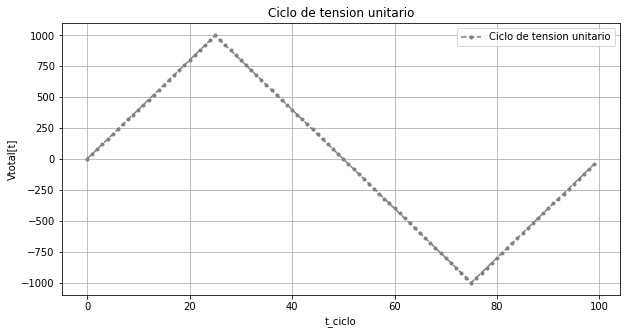

In [3]:
#Ciclo de tension unitario
Vmax = 1000                #Seteado asi en Rozenberg
s = 100                    #Cantidad de time steps t que componen un ciclo de tension unitario
k = Vmax / (s/4)           #Pendiente de la rampa

#Definimos un ciclo de tension unitario
t_ciclo_unitario = list(range(0,s)) 
V_unitario = list(range(0,s))

V0 = Vmax * 0.016            #Seteado asi en Rozemberg

for t in t_ciclo_unitario:
    if (0 <= t <s/4):
        V_unitario[t]= k*t
    if (s/4 <= t <=s*3/4):
        V_unitario[t]= 2*Vmax-k*t
    if (s*3/4 < t <=s):
        V_unitario[t]= -4*Vmax+k*t

plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo_unitario, V_unitario, '.', linestyle='dashed', label='Ciclo de tension unitario', color='grey')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Vtotal[t]')
plt.title('Ciclo de tension unitario')
plt.grid(True)

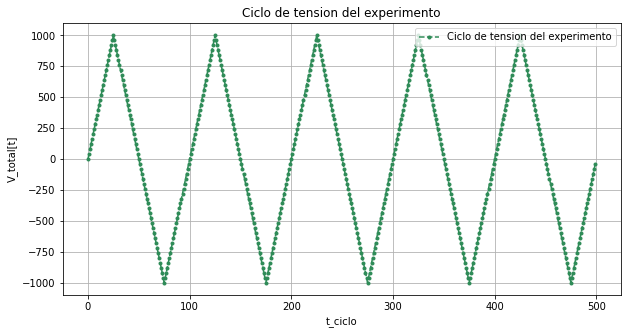

In [4]:
#Ciclo de tension del experimento --> puede contener varios ciclos de tension unitarios
n_ciclos= 5                  #Cantidad de ciclos que componen el experimento
tau= n_ciclos*s              #Tiempo total del experimento
t_ciclo = list(range(0,tau))
V_total = list(range(0,0))

#if n_ciclos>1:
cont_ciclos=list(range(0,n_ciclos))
for k in cont_ciclos:
        #V_total2.extend(V_total)
        V_total=V_total+V_unitario

#print(t_ciclo)
#print(V_total2)

plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(t_ciclo, V_total, '.', linestyle='dashed', label='Ciclo de tension del experimento', color='seagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('V_total[t]')
plt.title('Ciclo de tension del experimento')
plt.grid(True)

### Parametros de movilidad de los contactos
***
Se definen los parametros de movilidad para cada sitio "n". Se usan mas adelante en el calculo de probabilidades de transicion de vacancias.

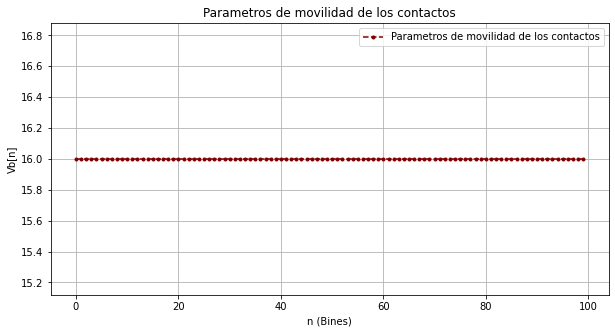

In [5]:
vb= list(range(0,N))            #Listado - movilidad de cada sitio i
VBA=16                           #Parametros - movilidad en extremos
VBB=16                           #Parametros - movilidad en el nucleo

for i in n:
    if i <= NR:
        vb[i]=VBA
    elif i >=len(n)-NR:   #obtengo long de la lista n
        vb[i]=VBA
    else:
        vb[i]=VBB
        
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, vb, '.', linestyle='dashed', label='Parametros de movilidad de los contactos', color='#800000')
plt.legend()
plt.xlabel('n (Bines)')
plt.ylabel('Vb[n]')
plt.title('Parametros de movilidad de los contactos')
plt.grid(True)

### Densidad de vacancias inicial y total
***
La densidad de vacancias iniciales se setean en 10E-4  
La densidad de vacancias total sera la sumatoria de todas las vacancias locales

La densidad total de vacancias es
0.009999999999999995


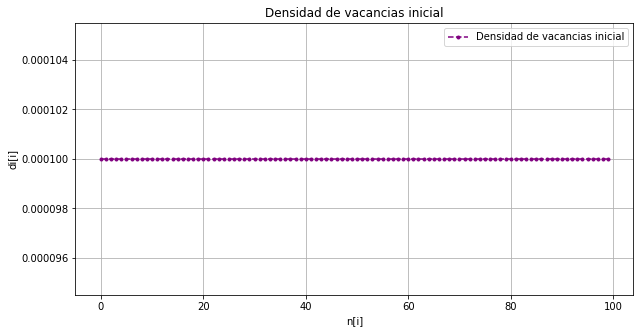

In [6]:
#Densidad de vacancias inicial --> 10E-4 Rozemberg
di= list(range(0,N)) 
for i in n:
    di[i]=0.0001

#Densidad de vacancias total
dtot=0
for i in n:
    dtot=dtot+di[i]

print("La densidad total de vacancias es")
print(dtot)
    
    
plt.rc('figure', figsize=(10, 5))
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.plot(n, di, '.', linestyle='dashed', label='Densidad de vacancias inicial', color='purple')
plt.legend()
plt.xlabel('n[i]')
plt.ylabel('di[i]')
plt.title('Densidad de vacancias inicial')
plt.grid(True)

### Resistividades locales
***
Se determinan los parametros para calcular las resistividades locales y posteriormente la resistividad total (sumatoria de las resistividades locales)  
* *Fact* son constantes en cada sector de la muestra  
* La resistividad de cada sitio se define como:  
                R(i) = A(i) * di(i)

In [7]:
rho= list(range(0,N))         #Variable de resistividad local
AL = 100                    #Valores seteados asi en Rozemberg
AR = 100
AB = 1

rho_total= list(range(0,tau))    ##Resistencia total
#rho_izq  = list(range(0,tau))    ##Resistencia izquierda
#rho_der  = list(range(0,tau))    ##Resistencia derecha

### Definicion de otras variables
***


In [8]:
i_total= list(range(0,tau))

delta = list(range(0,N))
piip1 = list(range(0,N))
pip1i = list(range(0,N))
piim1 = list(range(0,N))
pim1i = list(range(0,N))
deltap= list(range(0,N))
deltam= list(range(0,N))

dtot=list(range(0,tau))

Matrizd = [[0 for col in range(N)] for row in range(tau)]

### Cuerpo del codigo
***

In [9]:
for t in t_ciclo:
    rho_total[t]=0
    #rho_izq[t]=0
    #rho_der[t]=0
    
    #Registramos en una matriz la distribucion de densidad de vacancias en cada tiempo t del experimento
    for i in n:
        Matrizd[t][i] = di[i]
    
    #Calculamos densidad de vacancias totales en cada tiempo t del experimento
    dtot[t]=0
    for i in n:
        dtot[t]=dtot[t]+di[i]
        
    #Calculamos resistencias locales
    for i in n:
        if i <= NR:
            rho[i]=AL*di[i]
        elif i >=len(n)-NR:
            rho[i]=AR*di[i]
        else:
            rho[i]=AB*di[i]
    #Resistencias totales
    for i in n:
        rho_total[t]= rho_total[t]  + rho[i]

    #Corriente total
    i_total[t]= V_total[t]/rho_total[t] 

    #Calculo de las probabilidades de transicion entre sitios   im1 <-> i <-> ip1 
    for i in n:
        delta[i]=0
    
    for i in n:
        #Condiciones de borde extremo derecho
        if i==99:
            piip1[i]= 0
            pip1i[i]= 0
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]  -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]+i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i])
            else:
                deltap[i]=-min(-deltap[i],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]
            
        #Condiciones de borde extremo izquierdo
        elif i==0:
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]  +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]-i_total[t]* rho[i+1]/2)
            piim1[i]= 0
            pim1i[i]= 0

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i])
            else:
                deltam[i]=-min(-deltam[i],1-di[i])

            delta[i]=deltap[i]+deltam[i]
        
        #Calculo en el bulk
        else:
            piip1[i]= di[i]  *(1-di[i+1]) *np.exp(-vb[i]  +i_total[t]* rho[i]/2  )
            pip1i[i]= di[i+1]*(1-di[i])   *np.exp(-vb[i+1]-i_total[t]* rho[i+1]/2)
            piim1[i]= di[i]  *(1-di[i-1]) *np.exp(-vb[i]  -i_total[t]* rho[i]/2  )
            pim1i[i]= di[i-1]*(1-di[i])   *np.exp(-vb[i-1]+i_total[t]* rho[i-1]/2)

            deltap[i] = piip1[i]-pip1i[i]
            deltam[i] = piim1[i]-pim1i[i]

            if (deltap[i]>0):
                deltap[i]= min(deltap[i],di[i],1-di[i+1])
            else:
                deltap[i]=-min(-deltap[i],di[i+1],1-di[i])

            if (deltam[i]>0):
                deltam[i]= min(deltam[i],di[i],1-di[i-1])
            else:
                deltam[i]=-min(-deltam[i],di[i-1],1-di[i])

            delta[i]=deltap[i]+deltam[i]
            
    #Se actualiza la densidad local de vacancias, di(i)
    for i in n:
        di[i]=di[i]-delta[i]


### Grafica de los resultados
***
1. Graficamos V total (normalizada) en funcion Resistencia total  
2. Graficamos I total vs Resistencia total
3. Graficamos V total (normalizada) en funcion de I total normalizada 

  
Densidad total de vacancias del ciclo Nciclo:
0.010000000000000005
  
Resistencia total del ciclo Nciclo:
0.010000000000000004


Text(0, 0.5, 'Densidad de vacancias di(i)')

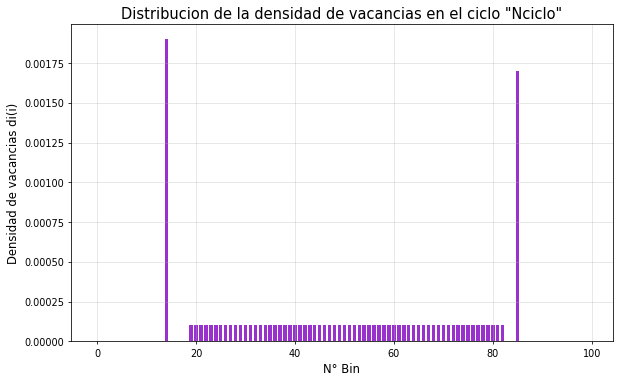

In [10]:
#Numero de ciclo al que le voy a graficar la distribucion de su densidad de vacancias:
#ver ejemplo ciclo 460. es uno de los puntos de bajisima Rtotal
Nciclo=465

#print(Matrizd[Nciclo])
print("  ")
print("Densidad total de vacancias del ciclo Nciclo:")
print(dtot[t])
print("  ")
print("Resistencia total del ciclo Nciclo:")
print(rho_total[Nciclo])



plt.figure(figsize=(10, 6), dpi=70)
plt.bar(range(len(Matrizd[Nciclo])), Matrizd[Nciclo] , width=0.7,color='#9932CC')
plt.grid(alpha=0.3,linestyle='-',linewidth=1)
plt.title('Distribucion de la densidad de vacancias en el ciclo "Nciclo"', fontsize=15)
plt.xlabel('N° Bin', fontsize=12)
plt.ylabel('Densidad de vacancias di(i)', fontsize=12)

Text(0.5, 1.0, 'Rho_total vs t_ciclo')

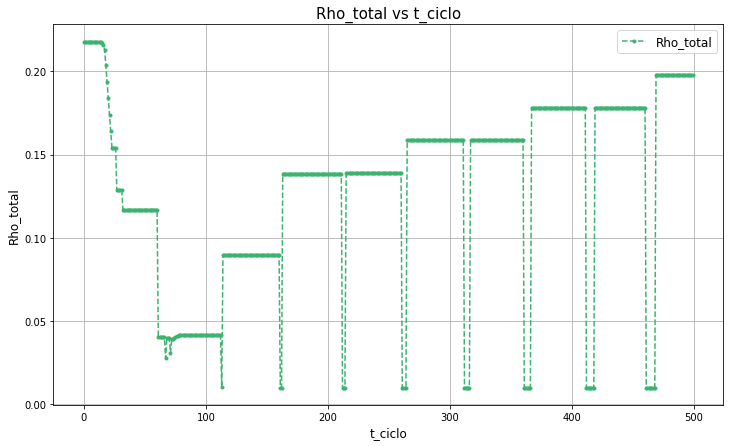

In [11]:
#print(t_ciclo)
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, rho_total,'.', linestyle='dashed', label='Rho_total', color='mediumseagreen')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Rho_total')
plt.title('Rho_total vs t_ciclo', fontsize=15)

Text(0.5, 1.0, '')

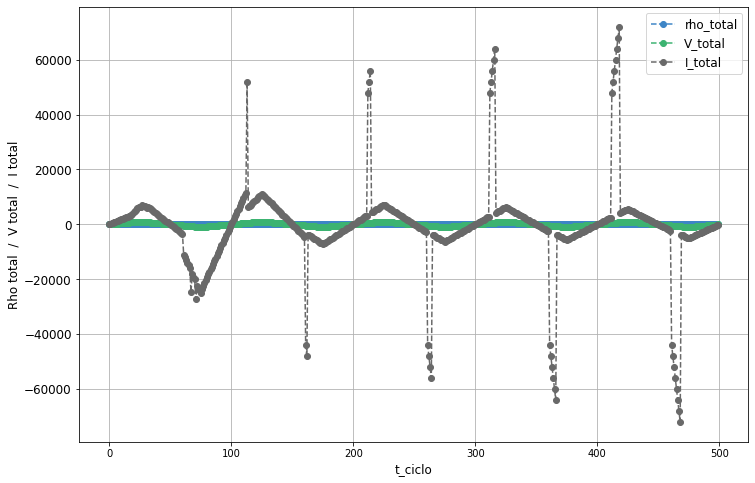

In [12]:
#print(rho_total)
#print(V_total)
#print(i_total)

plt.rc('figure', figsize=(12, 8))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, rho_total, 'o', linestyle='dashed', label='rho_total', color='#3d85c6')
plt.plot(t_ciclo, V_total, 'o', linestyle='dashed', label='V_total', color='mediumseagreen')
plt.plot(t_ciclo, i_total, 'o', linestyle='dashed', label='I_total',  color='dimgray')
plt.legend()
plt.xlabel('t_ciclo', fontsize=12)
plt.ylabel('Rho total  /  V total  /  I total', fontsize=12)
plt.title('', fontsize=20)

0.010000000000000007
0.009999999999999995


Text(0.5, 1.0, 'Densidad total de vacancias vs t_ciclo')

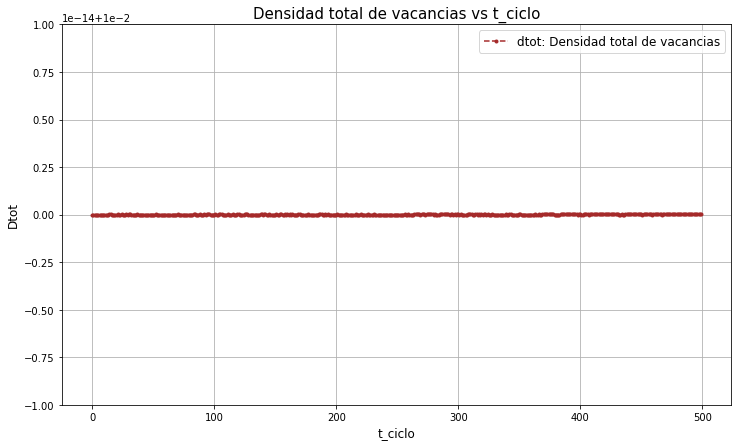

In [13]:
#print(t_ciclo)
print(max(dtot))
print(min(dtot))

# Se puede ver que la densidad total de vacancias se mantiene constante a lo largo del experimento --> no hay fuga de vacancias aparentemente

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(t_ciclo, dtot,'.', linestyle='dashed', label='dtot: Densidad total de vacancias', color='brown')
plt.legend()
plt.xlabel('t_ciclo')
plt.ylabel('Dtot')
plt.title('Densidad total de vacancias vs t_ciclo', fontsize=15)


Text(0.5, 1.0, 'Rho_total vs V_normalizada')

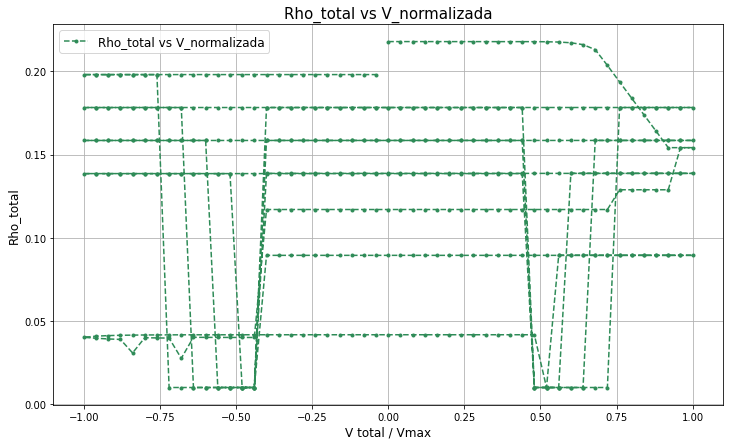

In [14]:
#print(rho_total)
#print(V_total)
V_normalizada= list(range(0,tau))
for t in t_ciclo:
    V_normalizada[t]= V_total[t]/Vmax

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(V_normalizada, rho_total, '.', linestyle='dashed', label='Rho_total vs V_normalizada', color='seagreen')
plt.legend()
plt.xlabel('V total / Vmax')
plt.ylabel('Rho_total')
plt.title('Rho_total vs V_normalizada', fontsize=15)

Text(0.5, 1.0, '')

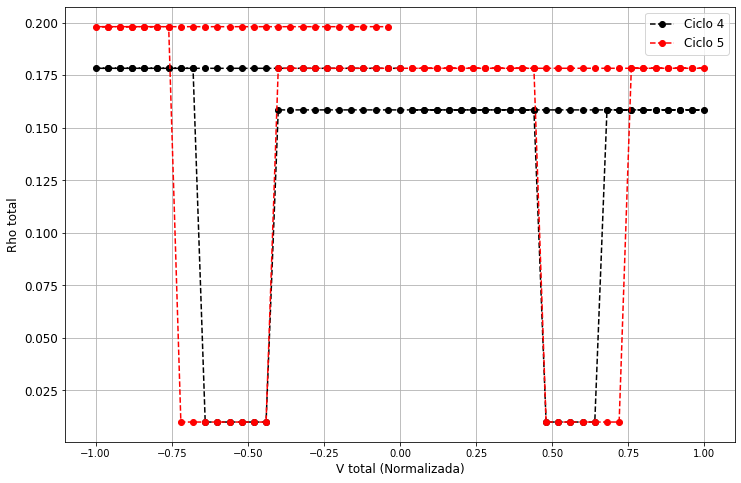

In [15]:
#Graficamos cada ciclo de tension del experimento por separado asi se aprecian mejor
V_c1=V_normalizada[0:101]
V_c2=V_normalizada[101:201]
V_c3=V_normalizada[201:301]
V_c4=V_normalizada[301:401]
V_c5=V_normalizada[401:501]

Rho_c1=rho_total[0:101]
Rho_c2=rho_total[101:201]
Rho_c3=rho_total[201:301]
Rho_c4=rho_total[301:401]
Rho_c5=rho_total[401:501]
#print(V_c1)
#print(V_c2)

plt.rc('figure', figsize=(12, 8))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(True)

#plt.plot(V_c1, Rho_c1, 'o', linestyle='dashed', label='Ciclo 1', color='#3d85c6')
#plt.plot(V_c2, Rho_c2, 'o', linestyle='dashed', label='Ciclo 2', color='mediumseagreen')
#plt.plot(V_c3, Rho_c3, 'o', linestyle='dashed', label='Ciclo 3',  color='dimgray')
plt.plot(V_c4, Rho_c4, 'o', linestyle='dashed', label='Ciclo 4', color='black')
plt.plot(V_c5, Rho_c5, 'o', linestyle='dashed', label='Ciclo 5', color='red')

plt.legend()
plt.xlabel('V total (Normalizada)', fontsize=12)
plt.ylabel('Rho total', fontsize=12)
plt.title('', fontsize=20)

Text(0.5, 1.0, 'Rho_total vs I normalizada')

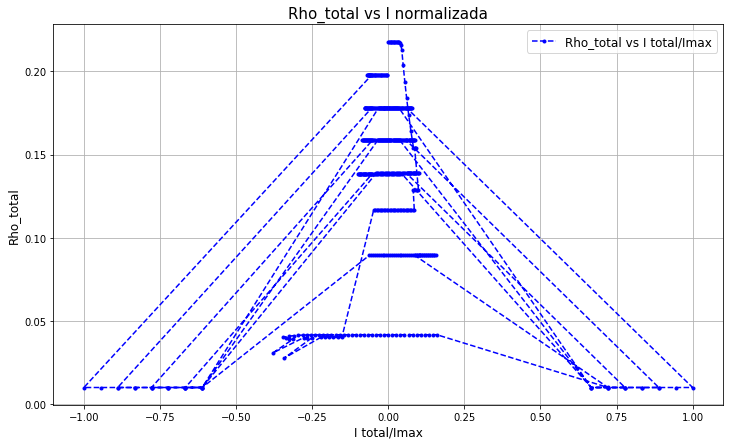

In [16]:
imax=max(i_total)

i_normalizada= list(range(0,tau))
for t in t_ciclo:
    i_normalizada[t]= i_total[t]/imax

plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada, rho_total, '.', linestyle='dashed', label='Rho_total vs I total/Imax', color='blue')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('Rho_total')
plt.title('Rho_total vs I normalizada', fontsize=15)

Text(0.5, 1.0, 'V normalizada vs I normalizada')

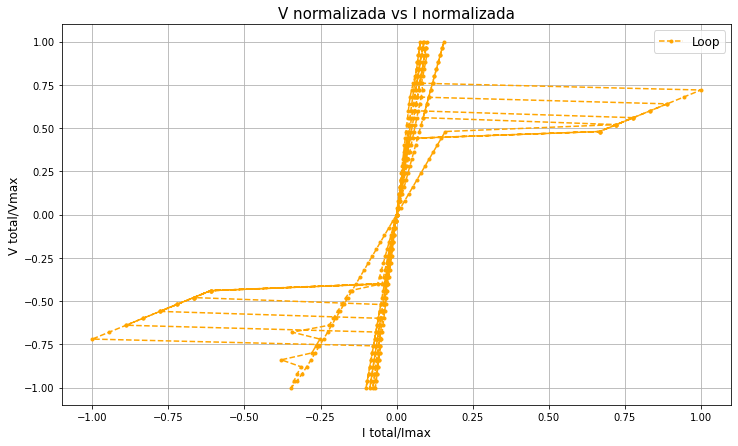

In [17]:
plt.rc('figure', figsize=(12, 7))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
plt.grid(True)
plt.plot(i_normalizada, V_normalizada, '.', linestyle='dashed', label='Loop', color='orange')
plt.legend()
plt.xlabel('I total/Imax')
plt.ylabel('V total/Vmax')
plt.title('V normalizada vs I normalizada', fontsize=15)